In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, ensemble, cross_validation, grid_search
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Importing and Exploring Dataset

In [2]:
full_df = pd.read_csv('clean_movie_data.csv', sep = "\t")
full_df = full_df.drop('Unnamed: 0', axis = 1)
full_df.dom_total_gross = full_df.dom_total_gross/1000000
full_df.budget = full_df.budget/1000000
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
adj_rank           212 non-null float64
budget             1612 non-null float64
composer           2097 non-null object
domestic_rank      2083 non-null float64
dom_total_gross    2097 non-null float64
movie_title        2096 non-null object
runtime            2096 non-null float64
year               2097 non-null int64
yearly_rank        1546 non-null float64
top_5              2097 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 163.9+ KB


In [71]:
full_df.describe()

,adj_rank,budget,domestic_rank,dom_total_gross,runtime,year,yearly_rank,top_5
count,212.000000,1612.000000,2083.000000,2097.000000,2096.000000,2097.000000,1546.000000,2097.000000
mean,113.297170,62.390679,1496.072492,82.654388,109.479962,2005.978541,53.565330,0.113019
std,57.027485,49.923478,1057.413200,81.767320,19.634624,6.122713,33.673282,0.316691
min,2.000000,0.015000,1.000000,1.646788,38.000000,1977.000000,1.000000,0.000000
25%,66.750000,25.000000,650.500000,34.562556,95.000000,2001.000000,26.000000,0.000000
50%,116.500000,50.000000,1379.000000,55.041738,107.000000,2006.000000,52.000000,0.000000
75%,164.250000,83.250000,2193.500000,100.317794,120.000000,2011.000000,78.000000,0.000000
max,200.000000,300.000000,6574.000000,936.662225,206.000000,2016.000000,204.000000,1.000000


In [5]:
#Creating Data Set with adjusted Rank
df = full_df.drop('composer', axis=1).drop('movie_title', axis=1)
df_adj = df.dropna()
df_adj

,adj_rank,budget,domestic_rank,dom_total_gross,runtime,year,yearly_rank,top_5
0,39.0,75.000,57.0,306.169268,153.0,1996,1.0,0
1,81.0,92.000,108.0,241.721524,113.0,1996,2.0,0
2,165.0,80.000,210.0,180.981856,110.0,1996,3.0,1
7,188.0,54.000,405.0,128.814019,103.0,1996,8.0,0
31,145.0,55.000,1536.0,50.047179,130.0,1996,32.0,0
100,5.0,200.000,3.0,658.672302,194.0,1997,1.0,0
101,82.0,90.000,100.0,250.690539,97.0,1997,2.0,1
102,103.0,73.000,122.0,229.086679,129.0,1997,3.0,1
104,199.0,85.000,235.0,172.956409,124.0,1997,5.0,0
110,111.0,125.000,560.0,107.325195,125.0,1997,12.0,0


## Histograms of dataset

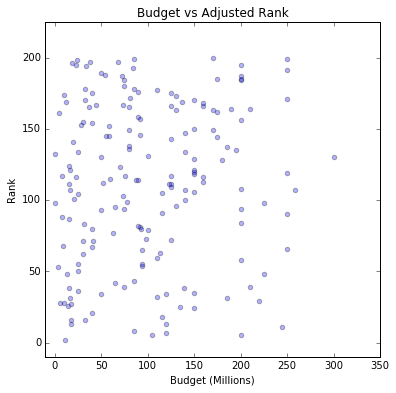

In [68]:
#Budget vs Adjusted Rank
plt.figure(figsize=(6,6))
plt.scatter(full_df.budget, full_df.adj_rank, alpha=.3)
plt.title('Budget vs Adjusted Rank')
plt.xlabel('Budget (Millions)')
plt.ylabel('Rank')
plt.xlim([-10,350])
plt.ylim([-10,225])
plt.show()

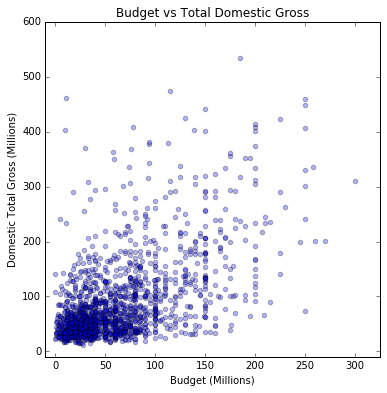

In [64]:
#Budget vs Total Gross
plt.figure(figsize=(6,6))
plt.scatter(full_df.budget,full_df.dom_total_gross, alpha=.3)
plt.title('Budget vs Total Domestic Gross')
plt.xlabel('Budget (Millions)')
plt.ylabel('Domestic Total Gross (Millions)')
plt.xlim([-10,325])
plt.ylim([-10,600])
plt.show()

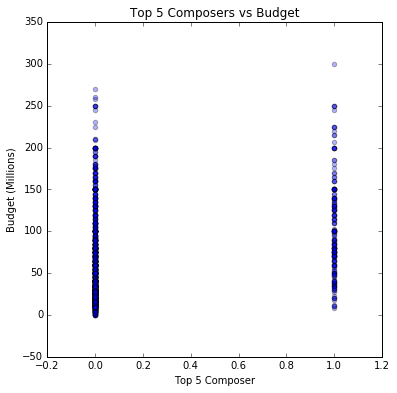

In [69]:
#Top 5 Composers vs Budget
plt.figure(figsize=(6,6))
plt.scatter(full_df.top_5, full_df.budget, alpha=.3)
plt.title('Top 5 Composers vs Budget')
plt.xlabel('Top 5 Composer')
plt.ylabel('Budget (Millions)')

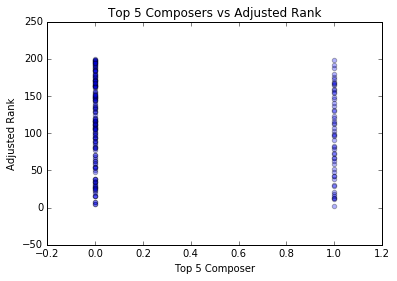

In [9]:
#Top 5 Composers vs Adjusted Rank
plt.scatter(full_df.top_5, full_df.adj_rank, alpha=.3)
plt.title('Top 5 Composers vs Adjusted Rank')
plt.xlabel('Top 5 Composer')
plt.ylabel('Adjusted Rank')

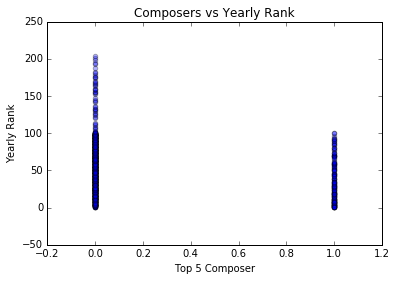

In [10]:
#Top 5 Composers vs Yearly Rank
plt.scatter(full_df.top_5, full_df.yearly_rank, alpha=.3)
plt.title('Composers vs Yearly Rank')
plt.xlabel('Top 5 Composer')
plt.ylabel('Yearly Rank')

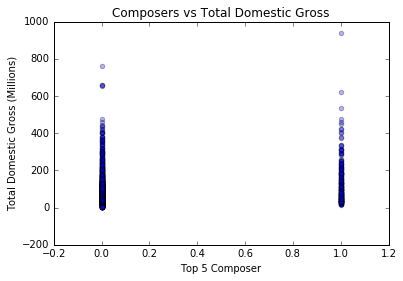

In [11]:
#Top 5 Composer vs Total Domestic Gross
plt.scatter(full_df.top_5, full_df.dom_total_gross, alpha=.3)
plt.title('Composers vs Total Domestic Gross')
plt.xlabel('Top 5 Composer')
plt.ylabel('Total Domestic Gross (Millions)')

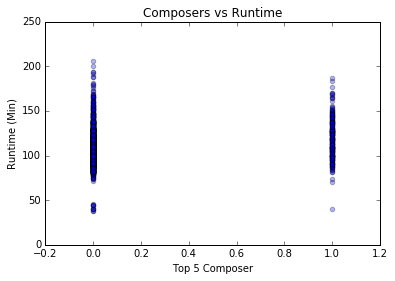

In [12]:
#Top 5 Composer vs Runtime
plt.scatter(full_df.top_5, full_df.runtime, alpha=.3)
plt.title('Composers vs Runtime')
plt.xlabel('Top 5 Composer')
plt.ylabel('Runtime (Min)')

## Analysis using Adjusted Rank as y value

In [13]:
#Using Adjusted Rank as y
X, y = df_adj.drop('adj_rank', axis=1),df_adj['adj_rank']

#Split the data into a train and est set (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [14]:
#Testing Different Models
models = {}
models['lin_reg'] = linear_model.LinearRegression()
models['ridge'] = linear_model.Ridge()
models['lasso'] = linear_model.Lasso()
models['elasticnet'] = linear_model.ElasticNet()

In [15]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X.columns.values,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: lin_reg
Score: 0.0452978372737
('top_5', -4.5614203829698035)
('year', 3.3064532189004026)
('yearly_rank', -3.0211957734371793)
('runtime', -0.27116295163991438)
('dom_total_gross', -0.21918275111109087)
('domestic_rank', 0.073440247090383742)
('budget', 0.045055690575781883)

Model: lasso
Score: 0.0541258340072
('year', 3.3285233021223029)
('yearly_rank', -2.9546115203530929)
('runtime', -0.28527289711838694)
('dom_total_gross', -0.21939750245468231)
('domestic_rank', 0.071239826430689504)
('budget', 0.041731931398470187)
('top_5', -0.0)

Model: elasticnet
Score: 0.053450061165
('year', 3.2115263468005706)
('yearly_rank', -2.8054026965631853)
('top_5', -0.59905054255822865)
('runtime', -0.28349640801108722)
('dom_total_gross', -0.22013252074375847)
('domestic_rank', 0.066333726245251204)
('budget', 0.047746764759449833)

Model: ridge
Score: 0.0458450499839
('top_5', -4.3002976130526909)
('year', 3.3097562344208096)
('yearly_rank', -3.0207038979107059)
('runtime', -0.27212496208

Since adjusted rank as target yielded incredibly low scores, most likely due to the small amount of data available, moved on to Total Domestic Gross as target

## Creating Data Set with Total Domestic Gross as Target

In [16]:
#Creating Data Set without Adjusted Rank
df = full_df.drop('composer', axis=1).drop('movie_title', axis=1).drop('adj_rank', axis=1)
df_noadj = df.dropna()
df_noadj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 2096
Data columns (total 7 columns):
budget             1122 non-null float64
domestic_rank      1122 non-null float64
dom_total_gross    1122 non-null float64
runtime            1122 non-null float64
year               1122 non-null int64
yearly_rank        1122 non-null float64
top_5              1122 non-null int64
dtypes: float64(5), int64(2)
memory usage: 70.1 KB


## Analyzing Total Domestic Gross

In [17]:
#Using Domestic Total Gross as y
X, y = df_noadj.drop('dom_total_gross', axis=1).drop('yearly_rank', axis=1).drop('domestic_rank', axis=1),df_noadj['dom_total_gross']

#Split the data into a train and est set (30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [18]:
#Regressions for Domestic Total Gross

print("For Domestic Total Gross\n")

for name,model in models.items():
    model.fit(X_train,y_train)
    print('Model: '+name)
    print("Score: " + str(model.score(X_test,y_test)))
    sorted_features = sorted(zip(X.columns.values,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

For Domestic Total Gross

Model: lin_reg
Score: 0.269926085126
('top_5', 28.022698143916021)
('budget', 0.89366433208265428)
('runtime', 0.32642467226550725)
('year', 0.28257042981665692)

Model: lasso
Score: 0.272156242982
('top_5', 17.088835030868466)
('budget', 0.91508956078382875)
('runtime', 0.33985367154032453)
('year', 0.18162624495459825)

Model: elasticnet
Score: 0.266613351215
('top_5', 3.4952320733672941)
('budget', 0.94066198642671672)
('runtime', 0.36083025981642225)
('year', 0.12616183620874069)

Model: ridge
Score: 0.270096578902
('top_5', 27.638527638834589)
('budget', 0.89439806636580732)
('runtime', 0.32698834428193346)
('year', 0.28046936530611671)



In [72]:
linear = linear_model.LinearRegression()

In [74]:
shuffler = cross_validation.ShuffleSplit(len(X_train), n_iter=5, test_size=.2, random_state = 40)

score = cross_validation.cross_val_score(linear, X_train, y_train, n_jobs=1, cv=shuffler)
results = linear.fit(X_train, y_train)

print('model: linear')
print('Scores: ' + str(score))
print('Average Score: ' + str(np.mean(score)))

model: linear
Scores: [ 0.38683666  0.31703647  0.29972523  0.36349549  0.3131746 ]
Average Score: 0.336053692119


In [77]:
results.coef_

array([  0.89366433,   0.32642467,   0.28257043,  28.02269814])

(0, 500)

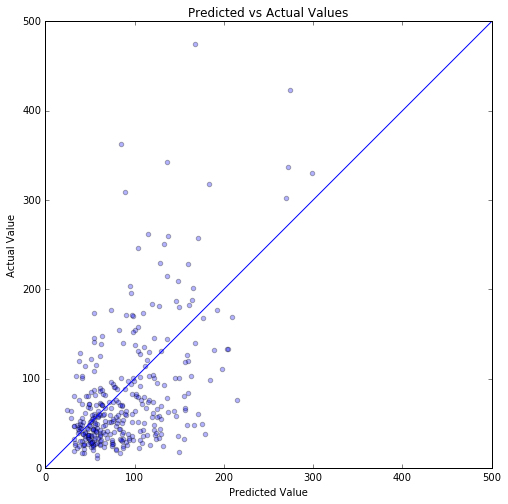

In [70]:
y_predict = linear.predict(X_test)

plt.figure(figsize=(8,8))
plt.scatter(y_predict, y_test, alpha = 0.3)
straight = np.linspace(0,500,10)
plt.plot(straight,straight)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Predicted vs Actual Values')
plt.xlim([0,500])
plt.ylim([0,500])

## Trying Lasso and Ridge

In [21]:
#Lasso

lasso = linear_model.Lasso()

shuffler = cross_validation.ShuffleSplit(len(X_train), n_iter=5, test_size=.2, random_state = 41)
    
score = cross_validation.cross_val_score(lasso, X_train, y_train, n_jobs=1, cv=shuffler)
lasso.fit(X_train, y_train)

print('model: lasso')
print('Scores: ' + str(score))
print('Average Score: ' + str(np.mean(score)))

#Tune lambda(alpha)
print('\nBest Model AFter GridSearch')
parameters = {'normalize':(True,False), 'alpha':np.logspace(-2,2,30)}
grid_searcher = grid_search.GridSearchCV(lasso, parameters, cv = shuffler)
grid_searcher.fit(X_train, y_train)
grid_searcher.best_params_

model: lasso
Scores: [ 0.30644945  0.2478431   0.38573392  0.32788813  0.28884142]
Average Score: 0.311351205101

Best Model AFter GridSearch


{'alpha': 0.048939009184774937, 'normalize': True}

In [22]:
best_model = grid_searcher.best_estimator_
best_model.coef_

array([  8.82362537e-01,   2.80069557e-01,   1.23252567e-02,
         2.46198141e+01])

In [23]:
#Ridge

ridge = linear_model.Ridge()

shuffler = cross_validation.ShuffleSplit(len(X_train), n_iter=5, test_size=.2, random_state = 41)
    
score = cross_validation.cross_val_score(ridge, X_train, y_train, n_jobs=1, cv=shuffler)
ridge.fit(X_train, y_train)

print('model: ridge')
print('Scores: ' + str(score))
print('Average Score: ' + str(np.mean(score)))

#Tune lambda(alpha)
print('\nBest Model AFter GridSearch')
parameters = {'normalize':(True,False), 'alpha':np.logspace(-2,2,30)}
grid_searcher = grid_search.GridSearchCV(ridge, parameters, cv = shuffler)
grid_searcher.fit(X_train, y_train)
grid_searcher.best_params_

model: ridge
Scores: [ 0.3131888   0.25986629  0.3979683   0.33444461  0.2955287 ]
Average Score: 0.320199340672

Best Model AFter GridSearch


{'alpha': 0.12689610031679222, 'normalize': True}

In [24]:
best_model = grid_searcher.best_estimator_
best_model.coef_

array([  0.78525832,   0.36516295,   0.37183994,  28.72392502])

Best score was actually linear regression, so sticking with that!